## import all packages


In [2]:
from pathlib import Path
import pandas as pd
from scipy import interpolate
import numpy as np
import math
import networkx as nx
from typing import Tuple, List
from math import log
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## define start and end time period

In [3]:
starttime = pd.Timestamp('2019-01-10 00:01:01.000000')
endtime = pd.Timestamp('2019-01-10 23:58:00.000000')


## define files and create a list of currencies file

In [4]:

fileAUDCAD =  r"C:\Users\cmbuser\Desktop\github\M-TechProject\CurrenciesExcahangeRate\AUDCAD"
fileGBPAUD = r"C:\Users\cmbuser\Desktop\github\M-TechProject\CurrenciesExcahangeRate\GBPAUD"
fileGBPCAD = r"C:\Users\cmbuser\Desktop\github\M-TechProject\CurrenciesExcahangeRate\GBPCAD"
listOfFiles = [fileAUDCAD,fileGBPAUD,fileGBPCAD]
listOfCurrencies = ["AUD","CAD","GBP"]

## Create Dataframe

This function will take filename as input and return corresponding dataframe structure

In [5]:
def createDataFRame(filename):
    dataframe = pd.read_csv(filename,parse_dates = True,index_col='Gmt time')
    dataframe.sort_index(inplace = True)
    dataframe['Ask']=dataframe['Ask'].round(5)
    dataframe['Bid']=dataframe['Bid'].round(5)
    
    dataframe.index = dataframe.index.astype(np.int64)
    ## Calculate cubic spline interpolation function 
    functionAsk = interpolate.interp1d(dataframe.index.values,dataframe['Ask'].values,kind='cubic')
    functionBid = interpolate.interp1d(dataframe.index.values,dataframe['Bid'].values,kind='cubic')
   
    dates = pd.date_range(start = starttime,end = endtime,freq='50ms')
    dates = dates.astype(np.int64)
    new_ask = functionAsk(dates)
    new_bid = functionBid(dates)
    ##dates = pd.to_datetime(dates,unit='ns')
    data = {'Ask':new_ask,
            'Bid':new_bid}
    dataframe = pd.DataFrame(data,index=dates)
    return dataframe





## create each of the dataframe

In [6]:
data= {x:createDataFRame(x) for x in listOfFiles}


In [7]:
audcad = data[listOfFiles[0]]
gbpaud = data[listOfFiles[1]]
gbpcad = data[listOfFiles[2]]
dates = pd.date_range(start = starttime,end = endtime,freq='50ms')


## lets visualize graphs

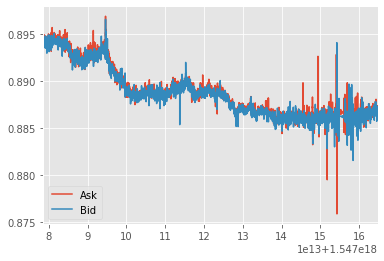

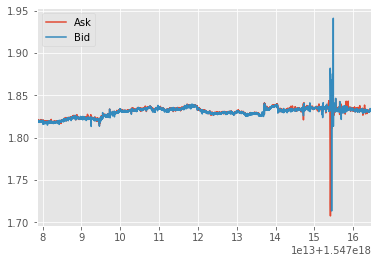

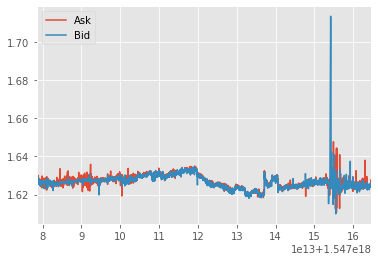

In [8]:
audcad.plot()
gbpaud.plot()
gbpcad.plot()

## visualize difference beetween bid and ask price 

,Ask,Bid,diff,spread
1547078497900000000,0.894061,0.894066,-0.000542,-0.000542
1547078497950000000,0.894061,0.894081,-0.001988,-0.001988
1547078498000000000,0.894061,0.894095,-0.003430,-0.003430
1547078498050000000,0.894060,0.894109,-0.004863,-0.004863
1547078498100000000,0.894060,0.894123,-0.006283,-0.006283
...,...,...,...,...
1547164670150000000,0.886799,0.886852,-0.005260,-0.005260
1547164670200000000,0.886799,0.886841,-0.004182,-0.004182
1547164670250000000,0.886799,0.886830,-0.003062,-0.003062
1547164670300000000,0.886799,0.886818,-0.001898,-0.001898


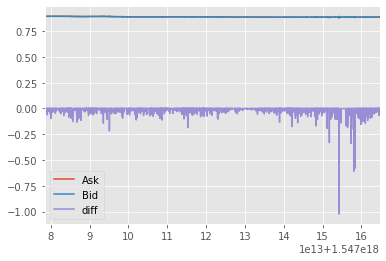

In [26]:
## spread in audcad
audcad['spread'] = (audcad['Ask'] - audcad['Bid']) *100
spread =audcad.loc[audcad['spread'] < 0]
time = spread.index
##dates = pd.to_datetime(time,unit='ns')
##spread.index = dates
anomolieoius_row.plot()
spread

,Ask,Bid,spread
1547078477600000000,1.820584,1.820588,-0.000459
1547078477650000000,1.820584,1.820594,-0.000974
1547078477700000000,1.820584,1.820599,-0.001483
1547078477750000000,1.820584,1.820604,-0.001987
1547078477800000000,1.820584,1.820609,-0.002485
...,...,...,...
1547164666050000000,1.832197,1.832230,-0.003260
1547164666100000000,1.832203,1.832230,-0.002660
1547164666150000000,1.832210,1.832230,-0.002021
1547164666200000000,1.832217,1.832230,-0.001343


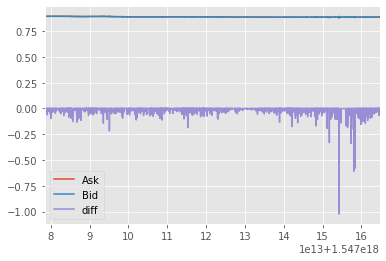

In [27]:
gbpaud['spread'] = (gbpaud['Ask'] - gbpaud['Bid']) *100
spread =gbpaud.loc[gbpaud['spread'] < 0]
time = spread.index
##dates = pd.to_datetime(time,unit='ns')
##spread.index = dates
anomolieoius_row.plot()
spread

,Ask,Bid,spread
2019-01-10 00:01:17.600,1.627723,1.627255,0.046782
2019-01-10 00:01:17.650,1.627724,1.627256,0.046817
2019-01-10 00:01:17.700,1.627725,1.627256,0.046850
2019-01-10 00:01:17.750,1.627726,1.627257,0.046882
2019-01-10 00:01:17.800,1.627726,1.627257,0.046913
...,...,...,...
2019-01-10 23:57:46.050,1.624950,1.624479,0.047153
2019-01-10 23:57:46.100,1.624951,1.624480,0.047060
2019-01-10 23:57:46.150,1.624951,1.624482,0.046966
2019-01-10 23:57:46.200,1.624952,1.624483,0.046872


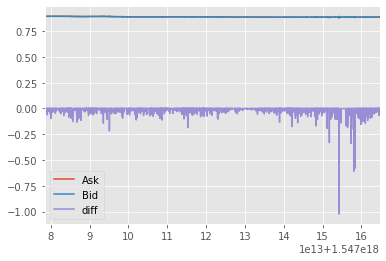

In [19]:
gbpcad['spread'] = (gbpcad['Ask'] - gbpcad['Bid']) *100
spread =gbpcad.loc[gbpaud['spread'] < 0]
time = spread.index
##dates = pd.to_datetime(time,unit='ns')
##spread.index = dates
anomolieoius_row.plot()
spread

In [31]:
listOfCurrencies = ["AUD","CAD","GBP"]    
def getMatrix(timstamp):
    timstamp = timstamp.to_datetime64()
    timstamp = timstamp.astype(np.int64)
    matrix = np.eye(3)
    matrix[0][1] = round(audcad.at[timstamp,'Ask'],5)
    matrix[0][2] = round(gbpaud.at[timstamp,'Ask'],5)
    matrix[1][2] = round(gbpcad.at[timstamp,'Ask'],5)
    matrix[1][0] = round(1 / audcad.at[timstamp,'Bid'],5)
    matrix[2][0] = round(1 / gbpaud.at[timstamp,'Bid'],5)
    matrix[2][1] = round(1 / gbpcad.at[timstamp,'Bid'],5)
    
    return matrix


In [32]:
getMatrix(dates[2])

array([[1.     , 0.89405, 1.82058],
       [1.11867, 1.     , 1.62772],
       [0.54927, 0.61453, 1.     ]])

## log and negate function 

In [33]:
def negate_logarithm_convertor(graph: Tuple[Tuple[float]]) -> List[List[float]]:
    ''' log of each rate in graph and negate it'''
    result = [[-log(edge) for edge in row] for row in graph]
    return result


## Create a function which will check negative cycle

 Bellmond ford algorithms is used to check the negative cycle.
 

In [34]:
def arbitrage(currency_tuple: tuple, rates_matrix: Tuple[Tuple[float, ...]]):
    ''' Calculates arbitrage situations and prints out the details of this calculations'''

    trans_graph = negate_logarithm_convertor(rates_matrix)

    # Pick any source vertex -- we can run Bellman-Ford from any vertex and get the right result

    source = 0
    n = len(trans_graph)
    min_dist = [float('inf')] * n

    pre = [-1] * n
    
    min_dist[source] = source

    # 'Relax edges |V-1| times'
    for _ in range(n-1):
        for source_curr in range(n):
            for dest_curr in range(n):
                if min_dist[dest_curr] > min_dist[source_curr] + trans_graph[source_curr][dest_curr]:
                    min_dist[dest_curr] = min_dist[source_curr] + trans_graph[source_curr][dest_curr]
                    pre[dest_curr] = source_curr

    # if we can still relax edges, then we have a negative cycle
    for source_curr in range(n):
        for dest_curr in range(n):
            if min_dist[dest_curr] > min_dist[source_curr] + trans_graph[source_curr][dest_curr]:
                # negative cycle exists, and use the predecessor chain to print the cycle
                print_cycle = [dest_curr, source_curr]
                # Start from the source and go backwards until you see the source vertex again or any vertex that already exists in print_cycle array
                while pre[source_curr] not in  print_cycle:
                    print_cycle.append(pre[source_curr])
                    source_curr = pre[source_curr]
                print_cycle.append(pre[source_curr])
                print("Arbitrage Opportunity: \n")
                print(" --> ".join([currencies[p] for p in print_cycle[::-1]]))



In [35]:
listOfCurrencies = ["AUD","CAD","GBP"]    
currencies = tuple(listOfCurrencies)
rates = getMatrix(dates[4])
rates = rates.tolist()
rates

[[1.0, 0.89405, 1.82058], [1.11867, 1.0, 1.62773], [0.54927, 0.61453, 1.0]]

In [36]:
arbitrage(currencies,rates)
np.array(rates)

Arbitrage Opportunity: 

GBP --> CAD --> AUD --> GBP
Arbitrage Opportunity: 

CAD --> GBP --> CAD --> AUD


array([[1.     , 0.89405, 1.82058],
       [1.11867, 1.     , 1.62773],
       [0.54927, 0.61453, 1.     ]])